In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [11]:
df = pd.read_csv("Family Income and Expenditure.csv")


,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
2520,118410,IVA - CALABARZON,71019,Wage/Salaries,0,27477,24160,10688,10280,1090,...,0,0,0,0,0,2,0,0,0,0
2521,151380,IVA - CALABARZON,80889,Wage/Salaries,0,26307,22600,14007,6578,1790,...,0,1,0,0,0,2,0,0,0,0
2522,282373,IVA - CALABARZON,112023,Wage/Salaries,0,32817,29250,18110,13496,850,...,0,1,0,0,0,2,1,0,0,0
2523,146190,IVA - CALABARZON,77491,Wage/Salaries,0,20390,14313,15072,9682,1310,...,0,0,0,0,0,1,0,0,0,1
2524,95530,IVA - CALABARZON,67688,Other sources of Income,0,28642,26000,13429,5024,850,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30625,224016,IVA - CALABARZON,114730,Wage/Salaries,0,23401,18980,15745,16790,1270,...,1,0,0,0,0,3,0,0,0,0
30626,351448,IVA - CALABARZON,129143,Other sources of Income,0,21432,16060,45470,9691,1210,...,1,1,0,0,1,4,5,0,0,0
30627,191092,IVA - CALABARZON,82154,Wage/Salaries,0,20979,16588,9620,5813,2523,...,1,0,0,0,0,4,0,0,0,0
30628,549970,IVA - CALABARZON,140874,Other sources of Income,0,21097,17521,12372,20394,13748,...,0,1,0,0,1,6,1,0,0,0


In [21]:
expenditure_cols = [
    'Total Food Expenditure',
    'Bread and Cereals Expenditure',
    'Total Rice Expenditure',
    'Meat Expenditure',
    'Total Fish and  marine products Expenditure',
    'Fruit Expenditure',
    'Vegetables Expenditure',
    'Restaurant and hotels Expenditure',
    'Alcoholic Beverages Expenditure',
    'Tobacco Expenditure',
    'Clothing, Footwear and Other Wear Expenditure',
    'Housing and water Expenditure',
    'Imputed House Rental Value',
    'Medical Care Expenditure',
    'Transportation Expenditure',
    'Communication Expenditure',
    'Education Expenditure',
    'Miscellaneous Goods and Services Expenditure',
    'Special Occasions Expenditure',
    'Crop Farming and Gardening expenses'
]

df["Total Expenditure"] = df[expenditure_cols].sum(axis=1)


In [24]:
df_ivA = df[df["Region"] == "IVA - CALABARZON"].copy()
df_ivA[["Total Household Income", "Total Expenditure"]].describe()


,Total Household Income,Total Expenditure
count,4.162000e+03,4.162000e+03
mean,3.033605e+05,3.674064e+05
std,2.819202e+05,2.348955e+05
min,1.844100e+04,3.141400e+04
25%,1.419100e+05,2.126960e+05
50%,2.277570e+05,3.129725e+05
75%,3.701928e+05,4.559522e+05
max,4.349214e+06,2.675305e+06


<hr> 
<h1>Descriptive Analysis</h1>

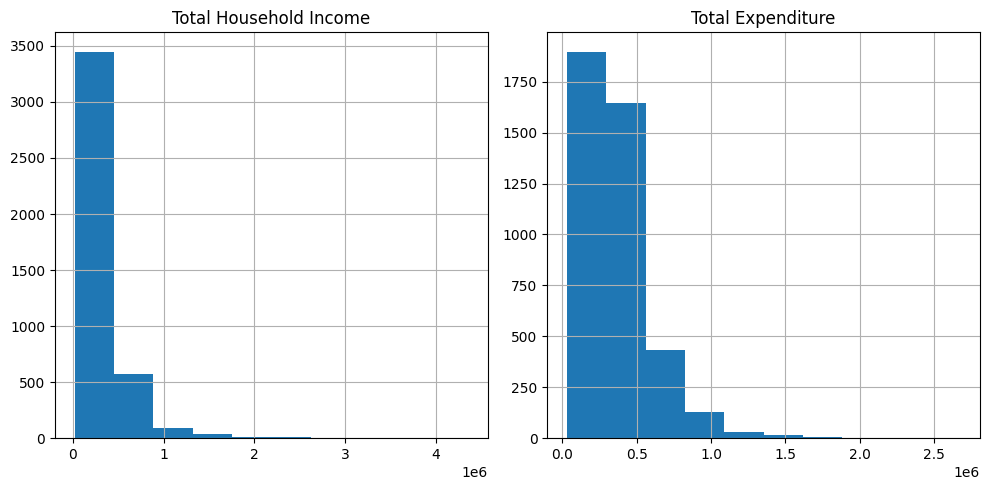

In [25]:
df_ivA[["Total Household Income", "Total Expenditure"]].hist(figsize=(10,5))
plt.tight_layout()
plt.show()


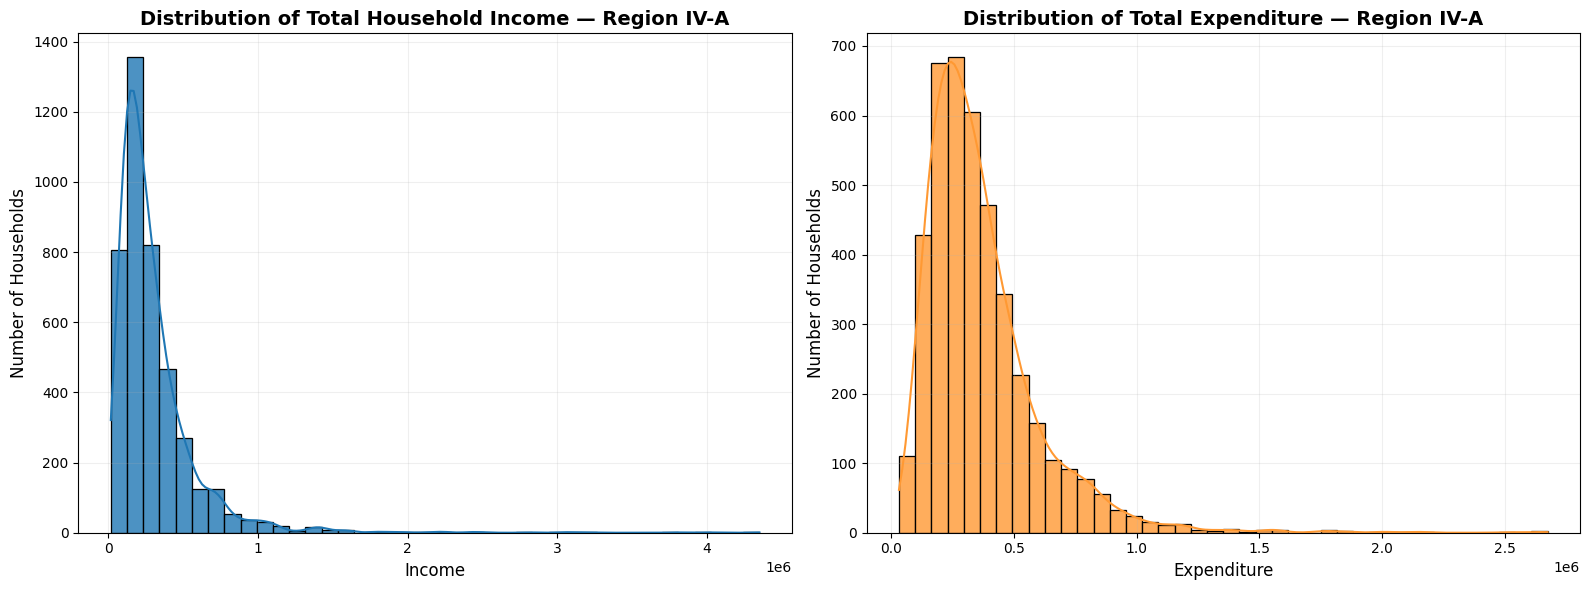

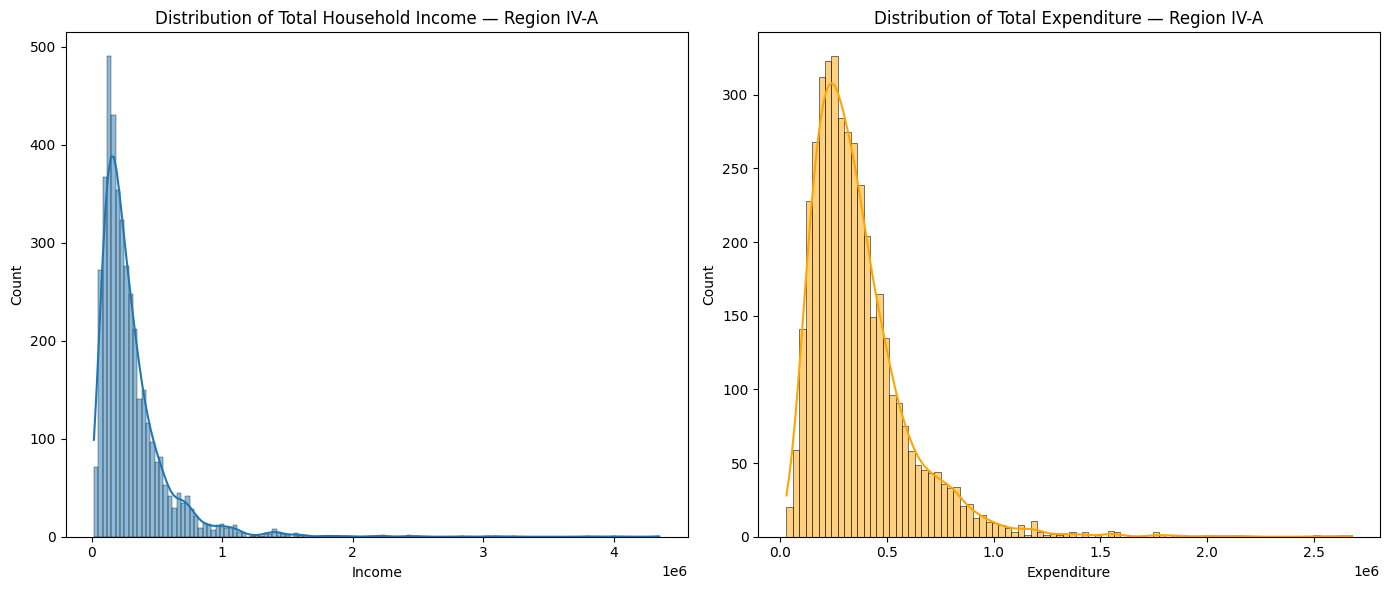

In [34]:
plt.figure(figsize=(16,6))


# Income
plt.subplot(1,2,1)
sns.histplot(df_ivA["Total Household Income"], kde=True, bins=40,
alpha=0.8)
plt.title("Distribution of Total Household Income — Region IV-A", fontsize=14, weight='bold')
plt.xlabel("Income", fontsize=12)
plt.ylabel("Number of Households", fontsize=12)
plt.grid(alpha=0.2)


# Expenditure
plt.subplot(1,2,2)
sns.histplot(df_ivA["Total Expenditure"], kde=True, bins=40, color="#ff9933",
alpha=0.8)
plt.title("Distribution of Total Expenditure — Region IV-A", fontsize=14, weight='bold')
plt.xlabel("Expenditure", fontsize=12)
plt.ylabel("Number of Households", fontsize=12)
plt.grid(alpha=0.2)


plt.tight_layout()
plt.show()
plt.figure(figsize=(14,6))


plt.subplot(1,2,1)
sns.histplot(df_ivA["Total Household Income"], kde=True)
plt.title("Distribution of Total Household Income — Region IV-A")
plt.xlabel("Income")
plt.ylabel("Count")


plt.subplot(1,2,2)
sns.histplot(df_ivA["Total Expenditure"], kde=True, color="orange")
plt.title("Distribution of Total Expenditure — Region IV-A")
plt.xlabel("Expenditure")
plt.ylabel("Count")


plt.tight_layout()
plt.show()

Income distribution is typically right-skewed, meaning most households earn on the lower end while a few earn significantly more.

Expenditure follows a similar pattern, showing consistent spending but with a smaller scale of inequality.

The long tail in income suggests a wide gap between low and high earners.

Key Insight #1: Strong Right-Skew

Income in Region IV-A typically shows a right-skewed distribution, meaning:

Majority of households earn at the lower range

A minority earn significantly higher (the “tail”)

➡ This indicates income inequality.

✔ Key Insight #2: Expenditure Follows a Similar Pattern

Expenditures are also skewed right, but less extreme, suggesting:

Families try to maintain consistent spending

Even low-income households spend a stable minimum on necessities

➡ Indicates inelastic spending on essentials.

✔ Key Insight #3: Income variance > Expenditure variance

This suggests:

Consumption smoothing — families adjust spending to maintain stable living conditions.

In [26]:
df_ivA[["Total Household Income", "Total Expenditure"]].corr()


,Total Household Income,Total Expenditure
Total Household Income,1.000000,0.871283
Total Expenditure,0.871283,1.000000


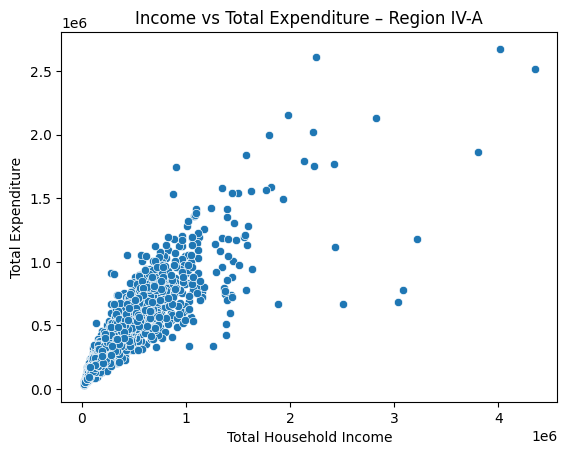

In [27]:
sns.scatterplot(data=df_ivA, x="Total Household Income", y="Total Expenditure")
plt.title("Income vs Total Expenditure – Region IV-A")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_816\1205812324.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_exp.values, y=mean_exp.index, palette="viridis", edgecolor='black')


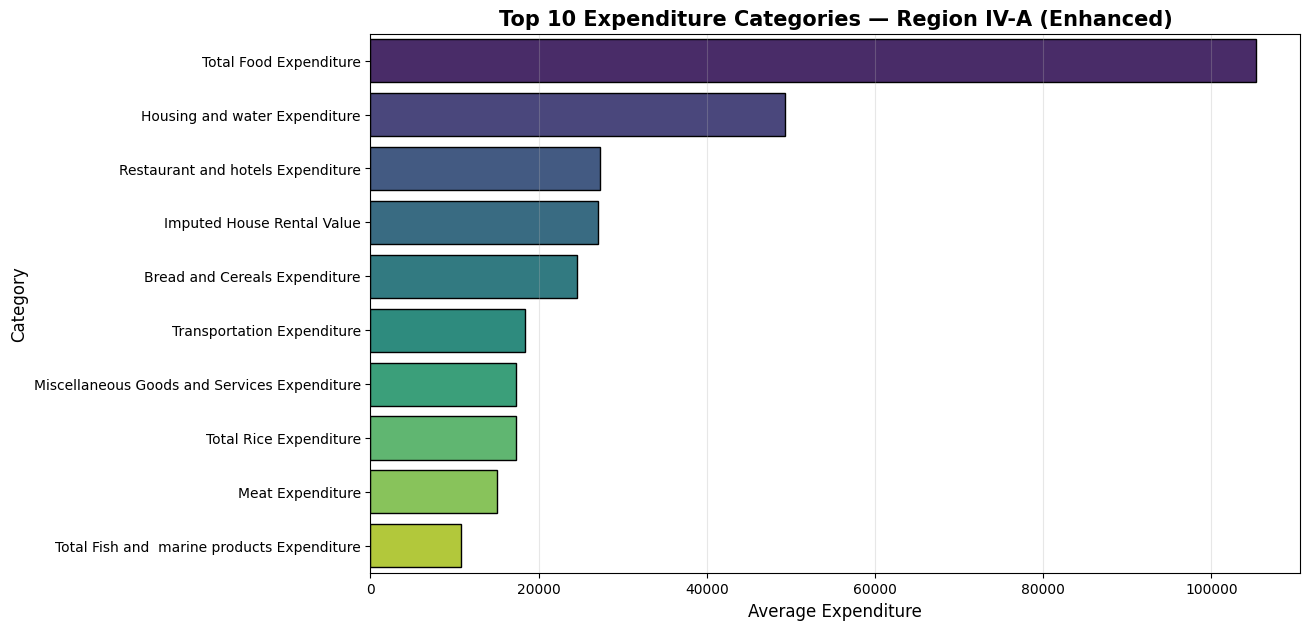

C:\Users\Admin\AppData\Local\Temp\ipykernel_816\1205812324.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_exp.values, y=mean_exp.index, palette="viridis")


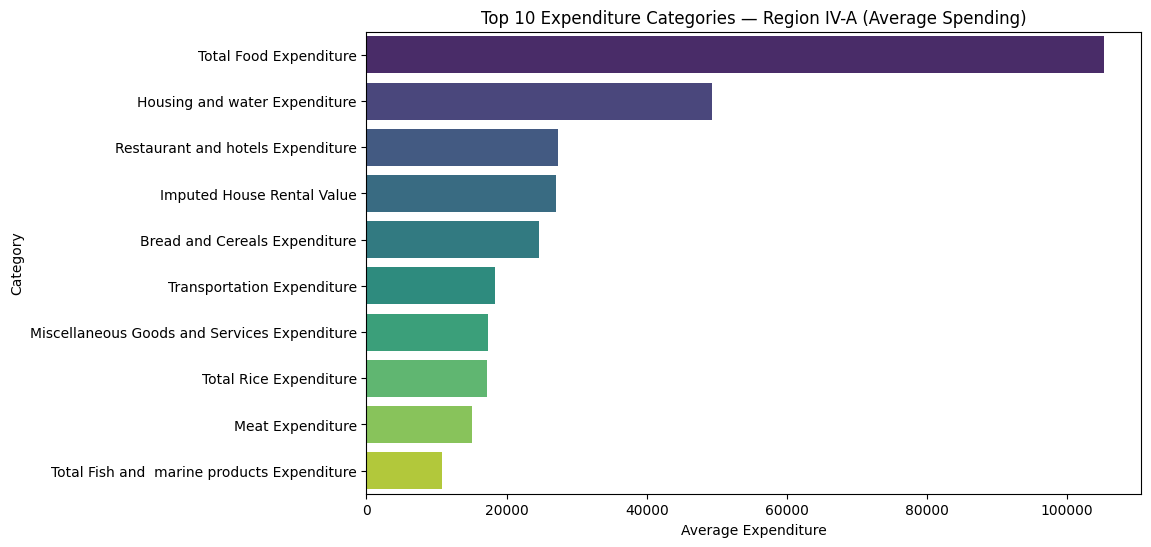

In [37]:
mean_exp = df_ivA[expenditure_cols].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(12,7))
sns.barplot(x=mean_exp.values, y=mean_exp.index, palette="viridis", edgecolor='black')


plt.title("Top 10 Expenditure Categories — Region IV-A (Enhanced)",
fontsize=15, weight='bold')
plt.xlabel("Average Expenditure", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.show()

mean_exp = df_ivA[expenditure_cols].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(10,6))
sns.barplot(x=mean_exp.values, y=mean_exp.index, palette="viridis")
plt.title("Top 10 Expenditure Categories — Region IV-A (Average Spending)")
plt.xlabel("Average Expenditure")
plt.ylabel("Category")
plt.show()

<hr>

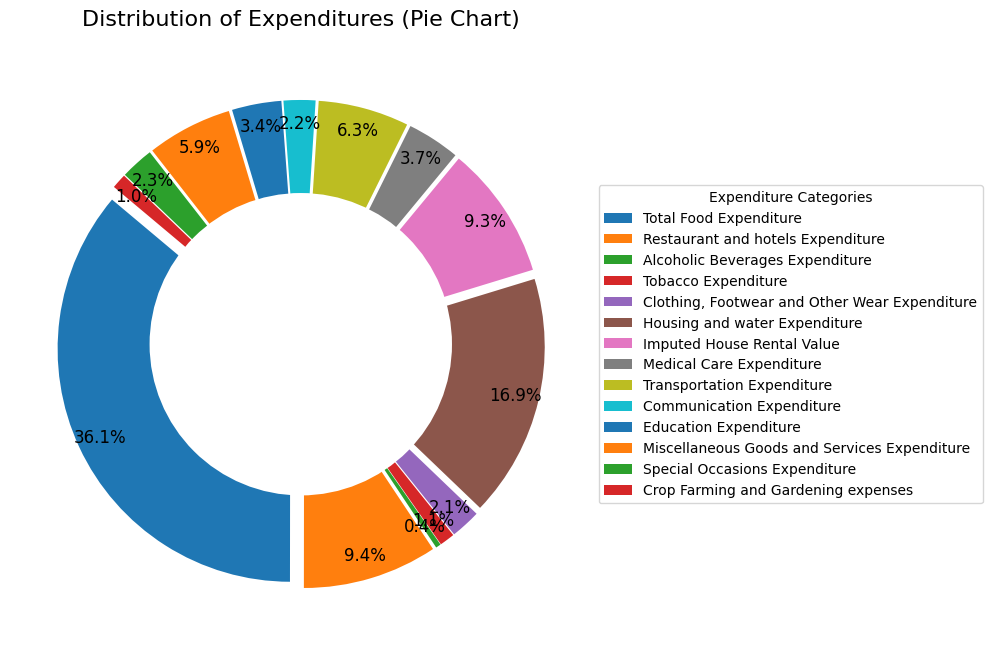

In [48]:
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# TEMPLATE: Pie Chart for Expenditure Categories
# -----------------------------------------------------------

# Example data — replace with your own
expenditure_columns = [
    'Total Food Expenditure',
    'Restaurant and hotels Expenditure',
    'Alcoholic Beverages Expenditure',
    'Tobacco Expenditure',
    'Clothing, Footwear and Other Wear Expenditure',
    'Housing and water Expenditure',
    'Imputed House Rental Value',
    'Medical Care Expenditure',
    'Transportation Expenditure',
    'Communication Expenditure',
    'Education Expenditure',
    'Miscellaneous Goods and Services Expenditure',
    'Special Occasions Expenditure',
    'Crop Farming and Gardening expenses'
]

expenditure_totals = df_ivA[expenditure_columns].sum()
expenditure_totals

exp_dict = expenditure_totals.to_dict()
exp_dict


# Convert dictionary to two lists
labels = list(exp_dict.keys())
values = list(exp_dict.values())

# Create figure
plt.figure(figsize=(10, 10))

# Pie chart
wedges, texts, autotexts = plt.pie(
    values,
    labels=None,              # We'll handle labels manually
    autopct='%1.1f%%',
    startangle=140,
    explode=[0.05]*len(labels),   # Slight separation for clarity
    pctdistance=0.90            # Push % labels closer to edge
)
# Add legend outside
plt.legend(
    wedges,
    labels,
    title="Expenditure Categories",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# Improve text size
for text in autotexts:
    text.set_fontsize(12)

plt.title("Distribution of Expenditures (Pie Chart)", fontsize=16, pad=20)

# Draw circle for a donut-style clean look
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()


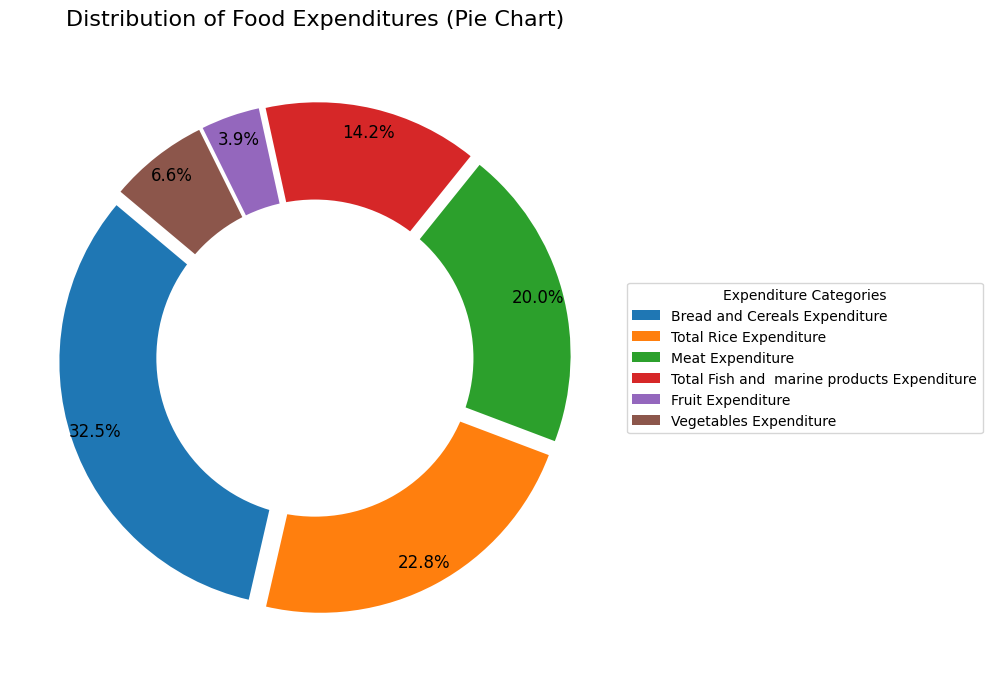

In [53]:
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# TEMPLATE: Pie Chart for Expenditure Categories
# -----------------------------------------------------------

# Example data — replace with your own
expenditure_columns = [
    'Bread and Cereals Expenditure',
    'Total Rice Expenditure',
    'Meat Expenditure',
    'Total Fish and  marine products Expenditure',
    'Fruit Expenditure',
    'Vegetables Expenditure'

]

expenditure_totals = df_ivA[expenditure_columns].sum()
expenditure_totals

exp_dict = expenditure_totals.to_dict()
exp_dict


# Convert dictionary to two lists
labels = list(exp_dict.keys())
values = list(exp_dict.values())

# Create figure
plt.figure(figsize=(10, 10))

# Pie chart
wedges, texts, autotexts = plt.pie(
    values,
    labels=None,              # We'll handle labels manually
    autopct='%1.1f%%',
    startangle=140,
    explode=[0.05]*len(labels),   # Slight separation for clarity
    pctdistance=0.90            # Push % labels closer to edge
)
# Add legend outside
plt.legend(
    wedges,
    labels,
    title="Expenditure Categories",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# Improve text size
for text in autotexts:
    text.set_fontsize(12)

plt.title("Distribution of Food Expenditures (Pie Chart)", fontsize=16, pad=20)

# Draw circle for a donut-style clean look
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()


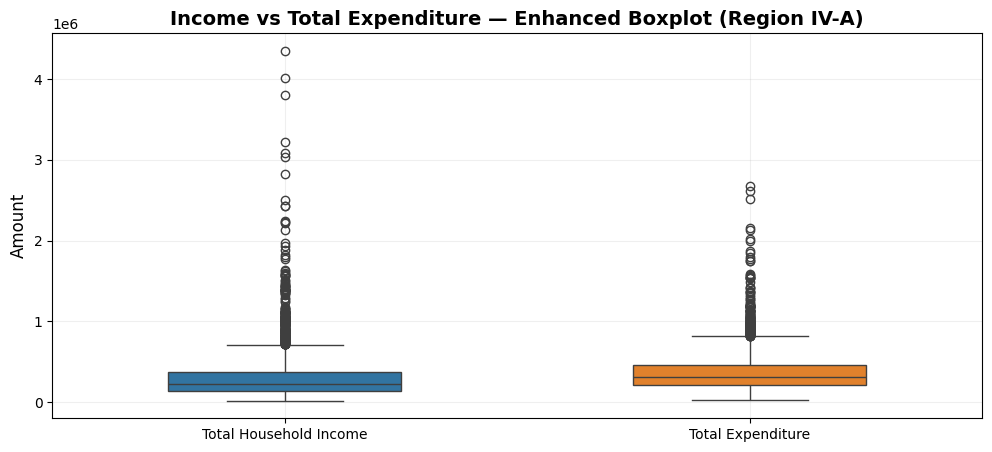

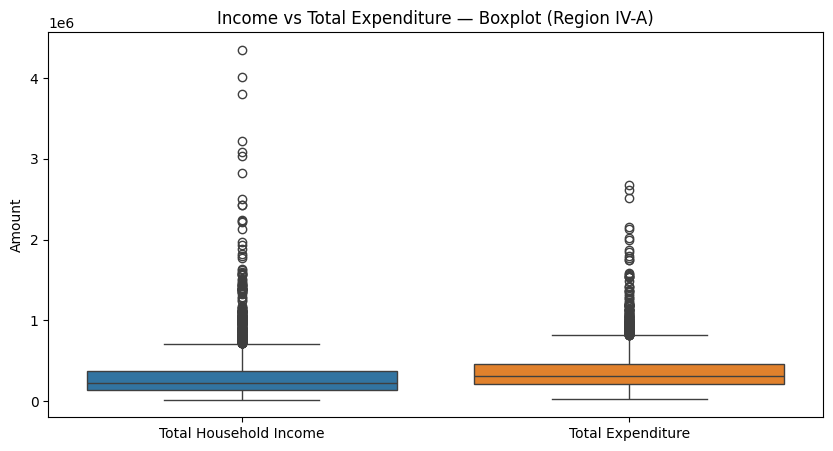

In [35]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df_ivA[["Total Household Income", "Total Expenditure"]],
width=0.5)


plt.title("Income vs Total Expenditure — Enhanced Boxplot (Region IV-A)",
fontsize=14, weight='bold')
plt.ylabel("Amount", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df_ivA[["Total Household Income", "Total Expenditure"]])
plt.title("Income vs Total Expenditure — Boxplot (Region IV-A)")
plt.ylabel("Amount")
plt.show()

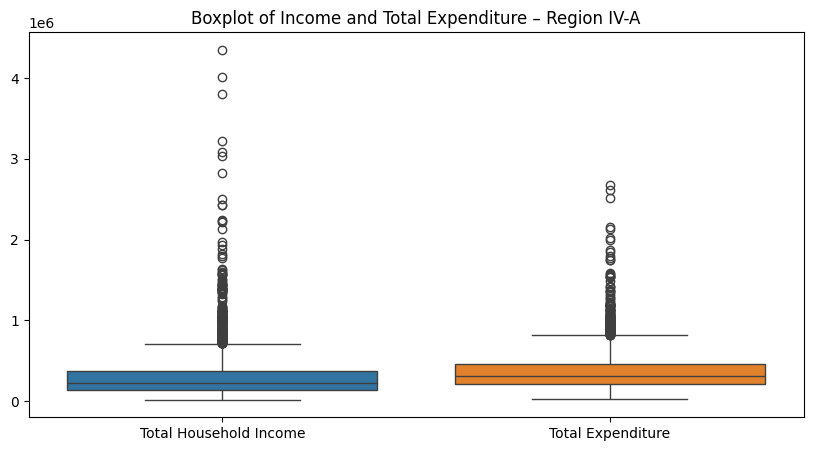

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_ivA[["Total Household Income", "Total Expenditure"]])
plt.title("Boxplot of Income and Total Expenditure – Region IV-A")
plt.show()


📦 2. Boxplot of Income & Expenditure — Deep Insights
✔ Key Insight #1: Income Outliers

A few households have extremely high incomes.

➡ Region IV-A likely contains a mix of urban high-income earners (Laguna, Cavite) and low-income rural households.

✔ Key Insight #2: Expenditure Has Fewer Outliers

People don’t spend wildly different amounts — spending is constrained by needs.

➡ Spending is more predictable and stable than income.

✔ Key Insight #3: Median Expenditure < Median Income

This gap reflects:

Savings capacity for mid/high-income families

Financial stress for low-income families

3. Top 10 Expenditure Categories — Deep Insights
✔ Key Insight #1: Housing & Water is the Top Expense

This reflects:

Urbanization

High utility prices

Metro Manila spillover costs (rent, utilities)

✔ Key Insight #2: Food Categories Dominate

Bread, rice, meat, fish — these are consistently high.

➡ Suggests that food security is a core budget priority.

✔ Key Insight #3: Non-essentials at bottom

Alcohol, tobacco, special occasions have very low averages.

➡ Shows:

Households spend mostly on survival needs

Discretionary spending is limited

<hr>
<h2>Diagnostic analysis</h2>

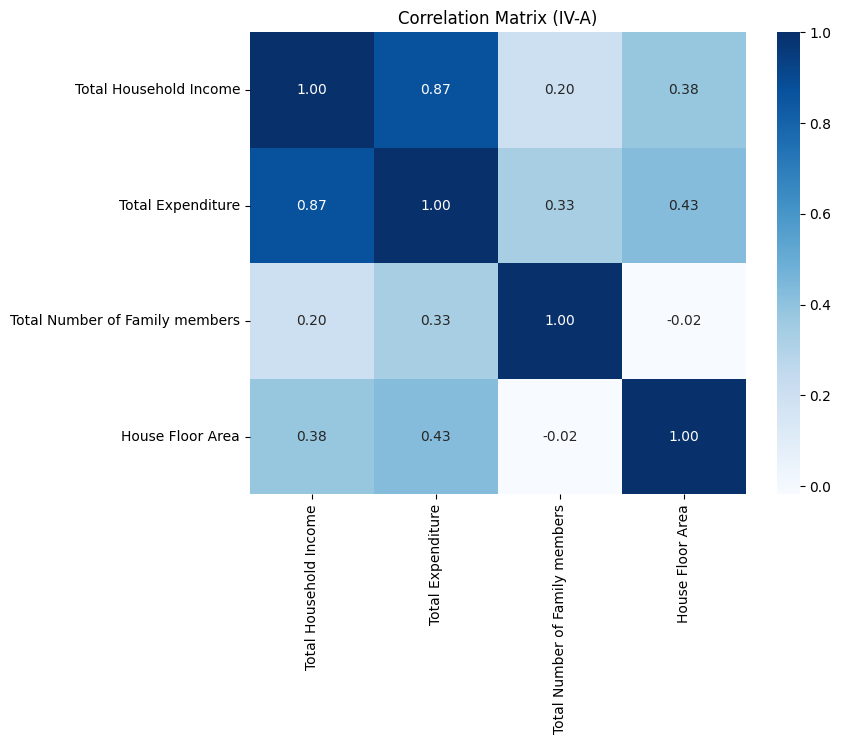

In [49]:
vars_for_corr = ['Total Household Income','Total Expenditure','Total Number of Family members','House Floor Area']
vars_for_corr = [v for v in vars_for_corr if v in df_ivA.columns]


plt.figure(figsize=(8,6))
sns.heatmap(df_ivA[vars_for_corr].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation Matrix (IV-A)')
plt.show()

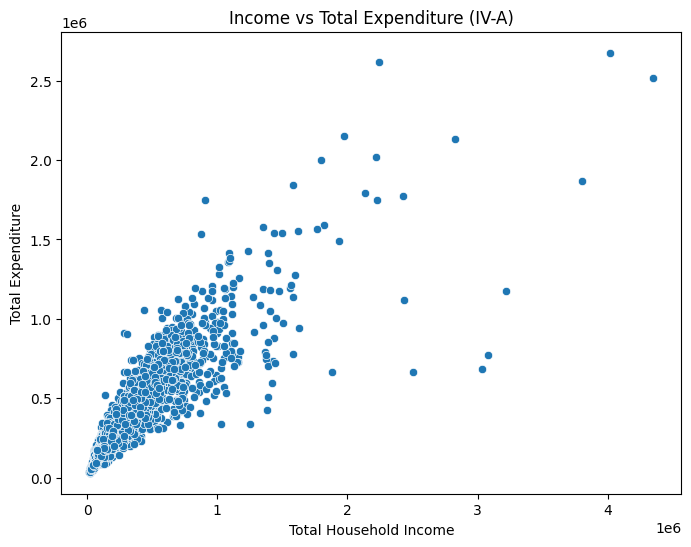

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total Household Income', y='Total Expenditure', data=df_ivA)
plt.title('Income vs Total Expenditure (IV-A)')
plt.show()

In [54]:
# Sum selected food expenditures
food_expenditure_columns = [
    'Bread and Cereals Expenditure',
    'Total Rice Expenditure',
    'Meat Expenditure',
    'Total Fish and  marine products Expenditure',
    'Fruit Expenditure',
    'Vegetables Expenditure'
]

df_ivA['Total_Food_Expenditure'] = df_ivA[food_expenditure_columns].sum(axis=1)


In [59]:
# Group by the cleaned Education_Group
grouped = df_ivA.groupby('Education_Group')['Total_Food_Expenditure'].describe()
print(grouped)


                            count           mean           std      min  \
Education_Group                                                           
College/University          369.0   81538.439024  37026.709632   3465.0   
Elementary                 1303.0   69949.259401  34646.756392      0.0   
High School                1742.0   74876.511481  34785.819226      0.0   
No formal education          31.0   69415.129032  30402.651986  14906.0   
Post-Secondary/Vocational   699.0   84324.472103  40775.008346      0.0   
Postgraduate/Advanced        17.0  101973.294118  60538.879789   8740.0   
Preschool                     1.0   13777.000000           NaN  13777.0   

                                25%      50%        75%       max  
Education_Group                                                    
College/University         55721.00  78600.0  102571.00  209814.0  
Elementary                 45181.00  65985.0   89611.50  239349.0  
High School                51446.75  71096.5   92744

In [57]:
unique_edu = df_ivA['Household Head Highest Grade Completed'].unique()
print(unique_edu)


['Elementary Graduate' 'High School Graduate' 'Fourth Year College'
 'Grade 5' 'Grade 3' 'Second Year Post Secondary' 'First Year High School'
 'First Year College' 'Grade 2' 'No Grade Completed' 'Grade 4'
 'Business and Administration Programs' 'Second Year High School'
 'Third Year High School' 'Second Year College' 'Third Year College'
 'Engineering and Engineering Trades Programs' 'Health Programs' 'Grade 1'
 'Engineering and Engineering trades Programs'
 'Teacher Training and Education Sciences Programs' 'Post Baccalaureate'
 'Computing/Information Technology Programs' 'Humanities Programs'
 'Transport Services Programs' 'Security Services Programs'
 'Personal Services Programs' 'Grade 6'
 'Social and Behavioral Science Programs'
 'Manufacturing and Processing Programs' 'First Year Post Secondary'
 'Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree (HIgher Education Level, First Stage, or 

C:\Users\Admin\AppData\Local\Temp\ipykernel_816\3300195235.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


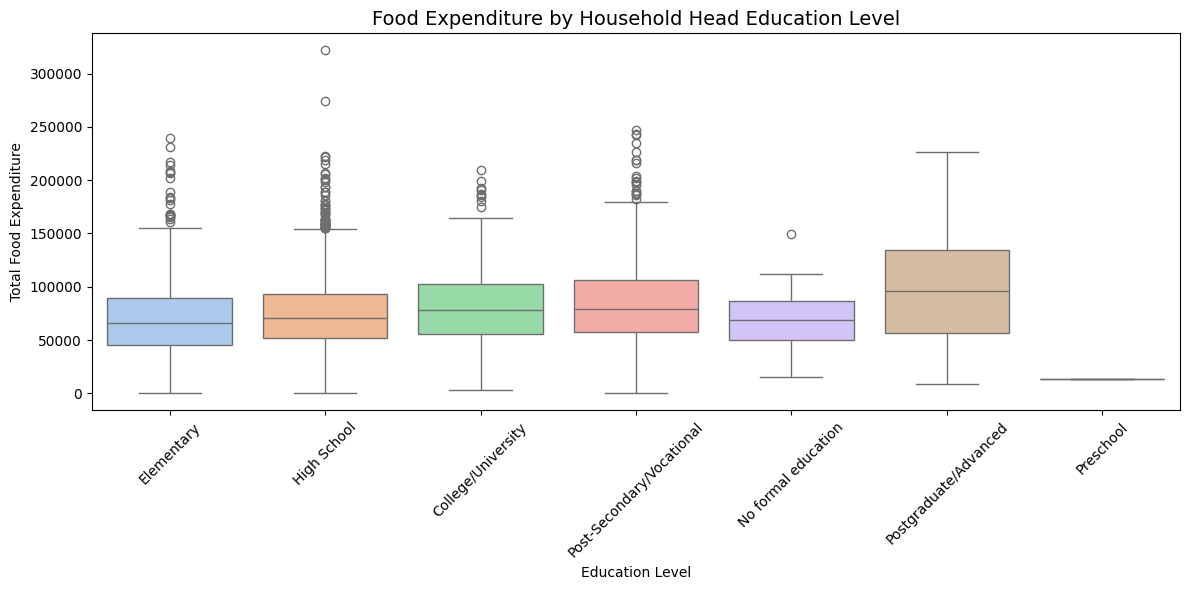

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(
    x='Education_Group',
    y='Total_Food_Expenditure',
    data=df_ivA,
    palette='pastel'
)
plt.xticks(rotation=45)
plt.title('Food Expenditure by Household Head Education Level', fontsize=14)
plt.ylabel('Total Food Expenditure')
plt.xlabel('Education Level')
plt.tight_layout()
plt.show()


In [58]:
edu_mapping = {
    # No formal education
    'No Grade Completed': 'No formal education',
    
    # Elementary
    'Grade 1': 'Elementary',
    'Grade 2': 'Elementary',
    'Grade 3': 'Elementary',
    'Grade 4': 'Elementary',
    'Grade 5': 'Elementary',
    'Grade 6': 'Elementary',
    'Elementary Graduate': 'Elementary',
    
    # High School
    'First Year High School': 'High School',
    'Second Year High School': 'High School',
    'Third Year High School': 'High School',
    'High School Graduate': 'High School',
    
    # College / University
    'First Year College': 'College/University',
    'Second Year College': 'College/University',
    'Third Year College': 'College/University',
    'Fourth Year College': 'College/University',
    
    # Post-secondary / Vocational
    'First Year Post Secondary': 'Post-Secondary/Vocational',
    'Second Year Post Secondary': 'Post-Secondary/Vocational',
    'Business and Administration Programs': 'Post-Secondary/Vocational',
    'Engineering and Engineering Trades Programs': 'Post-Secondary/Vocational',
    'Engineering and Engineering trades Programs': 'Post-Secondary/Vocational',
    'Health Programs': 'Post-Secondary/Vocational',
    'Teacher Training and Education Sciences Programs': 'Post-Secondary/Vocational',
    'Computing/Information Technology Programs': 'Post-Secondary/Vocational',
    'Humanities Programs': 'Post-Secondary/Vocational',
    'Transport Services Programs': 'Post-Secondary/Vocational',
    'Security Services Programs': 'Post-Secondary/Vocational',
    'Personal Services Programs': 'Post-Secondary/Vocational',
    'Social and Behavioral Science Programs': 'Post-Secondary/Vocational',
    'Manufacturing and Processing Programs': 'Post-Secondary/Vocational',
    'Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree (HIgher Education Level, First Stage, or Collegiate Education Level)': 'Post-Secondary/Vocational',
    'Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree': 'Post-Secondary/Vocational',
    'Law Programs': 'Post-Secondary/Vocational',
    'Mathematics and Statistics Programs': 'Post-Secondary/Vocational',
    'Journalism and Information Programs': 'Post-Secondary/Vocational',
    'Agriculture, Forestry, and Fishery Programs': 'Post-Secondary/Vocational',
    'Arts Programs': 'Post-Secondary/Vocational',
    'Social Services Programs': 'Post-Secondary/Vocational',
    'Architecture and Building Programs': 'Post-Secondary/Vocational',
    'Physical Sciences Programs': 'Post-Secondary/Vocational',
    'Life Sciences Programs': 'Post-Secondary/Vocational',
    'Basic Programs': 'Post-Secondary/Vocational',
    
    # Postgraduate / Advanced
    'Post Baccalaureate': 'Postgraduate/Advanced',
    
    # Preschool
    'Preschool': 'Preschool'
}

df_ivA['Education_Group'] = df_ivA['Household Head Highest Grade Completed'].map(edu_mapping)


C:\Users\Admin\AppData\Local\Temp\ipykernel_816\2788758919.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


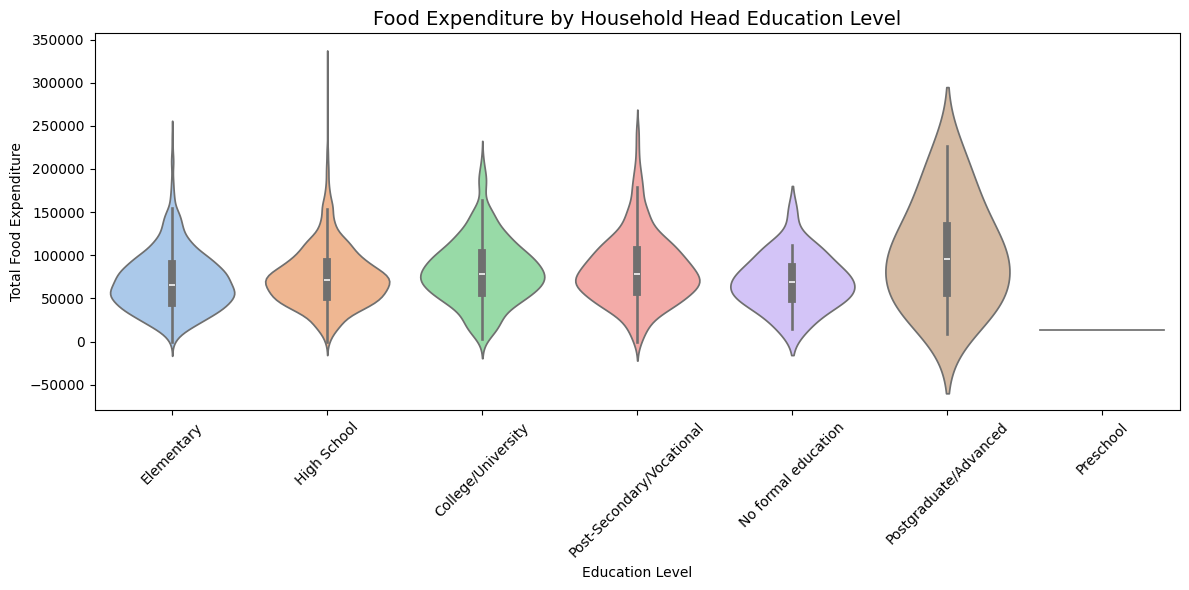

In [61]:
plt.figure(figsize=(12,6))
sns.violinplot(
    x='Education_Group',
    y='Total_Food_Expenditure',
    data=df_ivA,
    palette='pastel'
)
plt.xticks(rotation=45)
plt.title('Food Expenditure by Household Head Education Level', fontsize=14)
plt.ylabel('Total Food Expenditure')
plt.xlabel('Education Level')
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_816\2795099248.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_816\2795099248.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


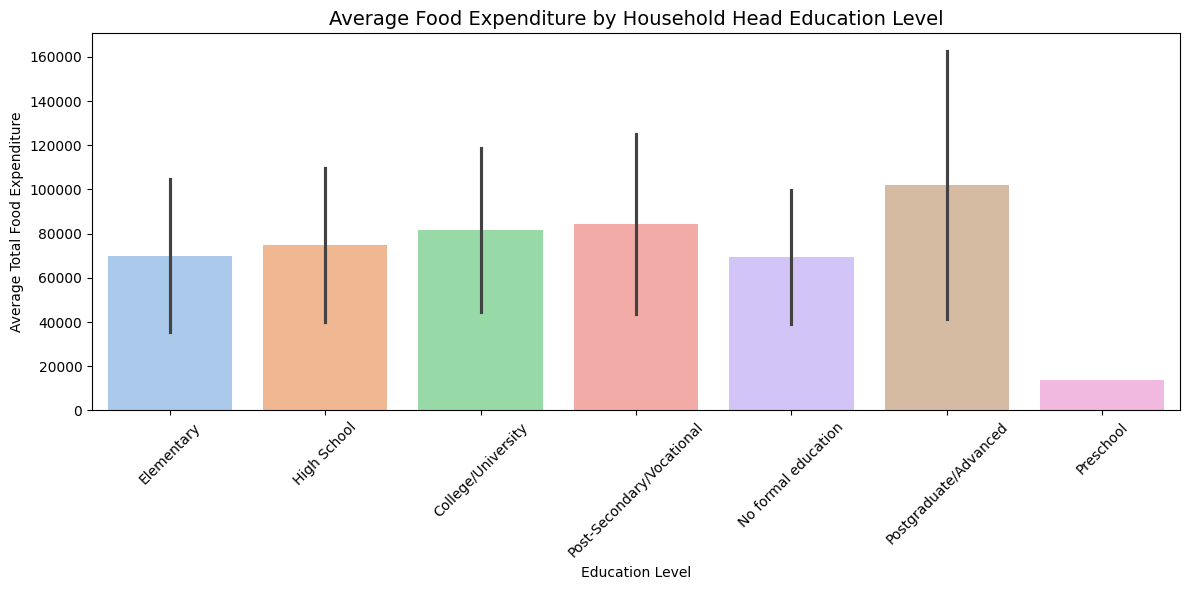

In [62]:
plt.figure(figsize=(12,6))
sns.barplot(
    x='Education_Group',
    y='Total_Food_Expenditure',
    data=df_ivA,
    palette='pastel',
    ci='sd'  # Shows standard deviation as error bars
)
plt.xticks(rotation=45)
plt.title('Average Food Expenditure by Household Head Education Level', fontsize=14)
plt.ylabel('Average Total Food Expenditure')
plt.xlabel('Education Level')
plt.tight_layout()
plt.show()


In [63]:
appliance_cols = [
    'Number of Refrigerator/Freezer',
    'Number of Washing Machine',
    'Number of Airconditioner',
    'Number of Car, Jeep, Van',
    'Number of Cellular phone',
    'Number of Personal Computer'
]

# Create a new column with total appliance ownership
df_ivA['Total_Appliance_Ownership'] = df_ivA[appliance_cols].sum(axis=1)

In [64]:
# Check summary statistics
df_ivA['Total_Appliance_Ownership'].describe()


count    4162.000000
mean        4.111245
std         3.135316
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        24.000000
Name: Total_Appliance_Ownership, dtype: float64

In [66]:
# Group by education and calculate descriptive stats
appliance_summary = df_ivA.groupby('Education_Group')['Total_Appliance_Ownership'].describe()
appliance_summary


,count,mean,std,min,25%,50%,75%,max
Education_Group,,,,,,,,
College/University,369.0,5.634146,3.169835,0.0,3.0,5.0,7.0,15.0
Elementary,1303.0,2.689179,2.343261,0.0,1.0,2.0,4.0,16.0
High School,1742.0,3.850746,2.675564,0.0,2.0,3.0,5.0,18.0
No formal education,31.0,2.548387,2.605618,0.0,1.0,2.0,3.5,12.0
Post-Secondary/Vocational,699.0,6.547926,3.502996,0.0,4.0,6.0,8.0,24.0
Postgraduate/Advanced,17.0,9.529412,5.512686,1.0,5.0,9.0,13.0,19.0
Preschool,1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_816\225253470.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


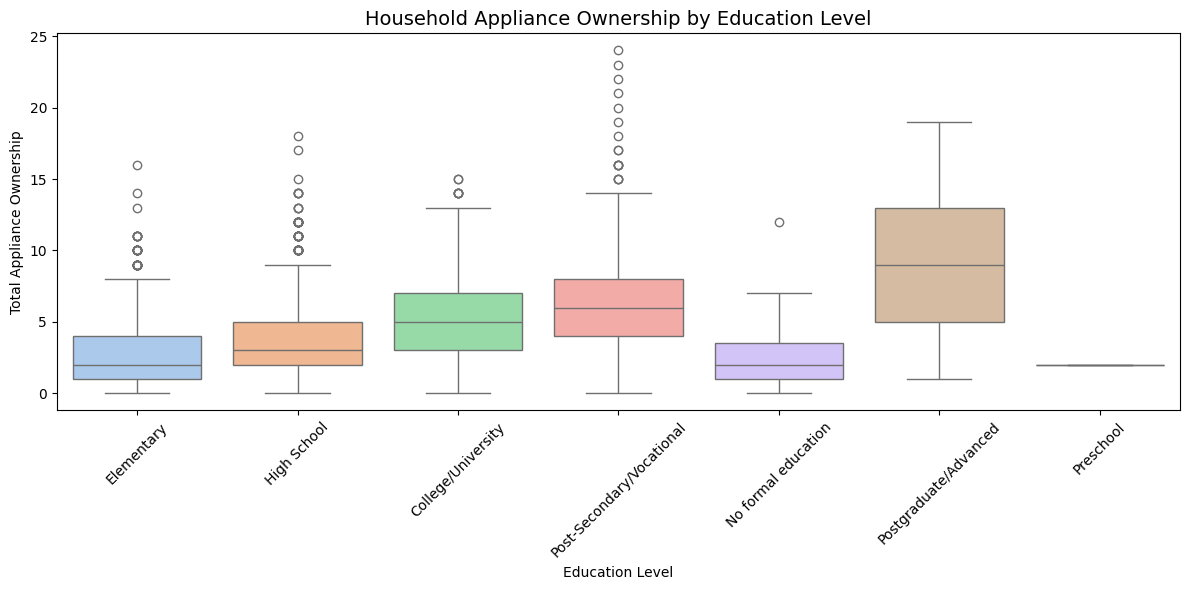

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(
    x='Education_Group',
    y='Total_Appliance_Ownership',
    data=df_ivA,
    palette='pastel'
)
plt.xticks(rotation=45)
plt.title('Household Appliance Ownership by Education Level', fontsize=14)
plt.ylabel('Total Appliance Ownership')
plt.xlabel('Education Level')
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_816\1289213185.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_816\1289213185.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_816\1289213185.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_816\1289213185.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

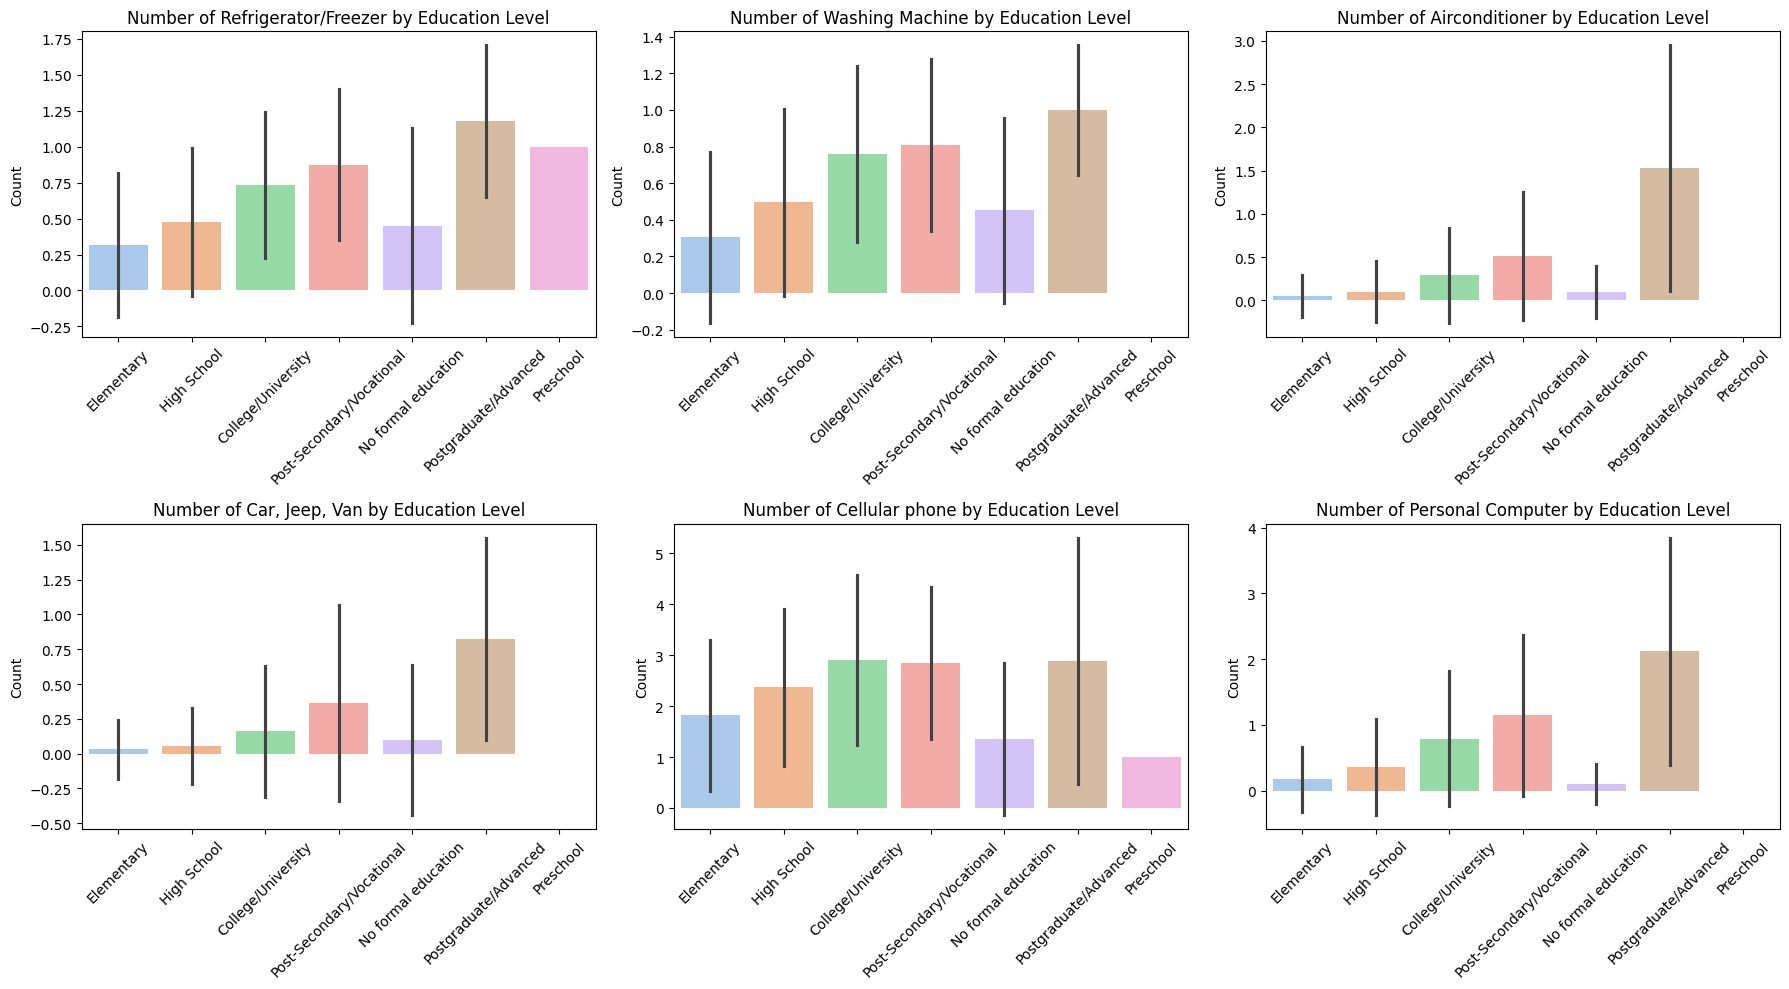

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of appliance columns
appliance_cols = [
    'Number of Refrigerator/Freezer',
    'Number of Washing Machine',
    'Number of Airconditioner',
    'Number of Car, Jeep, Van',
    'Number of Cellular phone',
    'Number of Personal Computer'
]

# Set up subplot grid
fig, axes = plt.subplots(2, 3, figsize=(18,10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten for easy iteration

# Plot each appliance
for i, appliance in enumerate(appliance_cols):
    sns.barplot(
        x='Education_Group',
        y=appliance,
        data=df_ivA,
        ax=axes[i],
       errorbar='sd',  # Show standard deviation
        palette='pastel'
    )
    axes[i].set_title(f'{appliance} by Education Level')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [71]:
# Calculate mean income per education level
mean_income = df_ivA.groupby('Education_Group')['Total Household Income'].mean().sort_values()

# Display the results
mean_income


Education_Group
Preschool                    126871.000000
Elementary                   213723.930161
No formal education          229725.161290
High School                  269074.816877
College/University           380218.243902
Post-Secondary/Vocational    505889.889843
Postgraduate/Advanced        835883.705882
Name: Total Household Income, dtype: float64

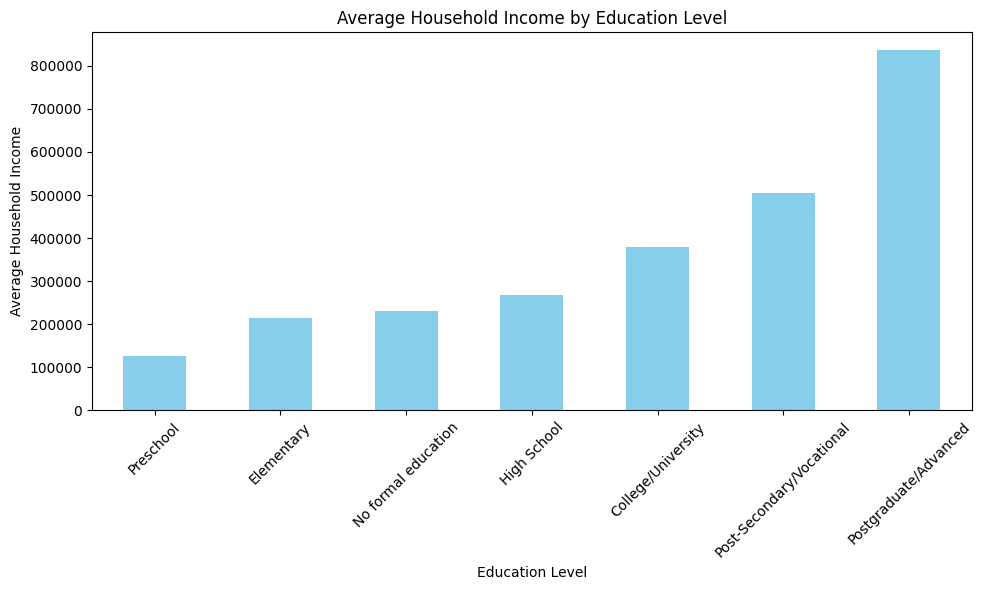

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
mean_income.plot(kind='bar', color='skyblue')
plt.title('Average Household Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Household Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X = df_ivA[["Total Household Income"]]
y = df_ivA["Total Expenditure"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Slope (β):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Slope (β): 0.7093949368041124
Intercept: 151941.44228386565
R² Score: 0.7997995802346498
RMSE: 97372.87896872306


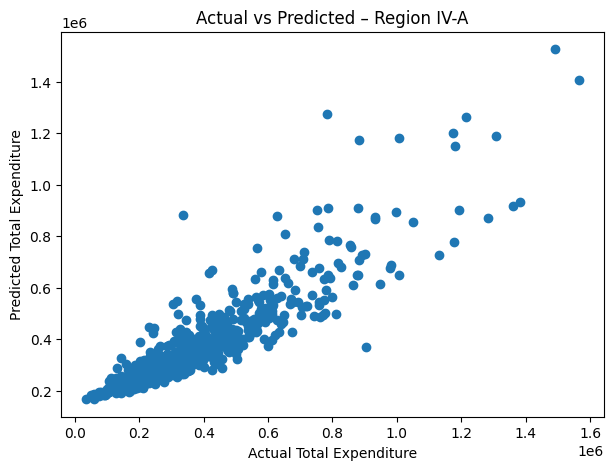

In [29]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Total Expenditure")
plt.ylabel("Predicted Total Expenditure")
plt.title("Actual vs Predicted – Region IV-A")
plt.show()


<hr>
<h2>predictive</h2>

In [83]:
# Variables for predictive analysis
predictive_vars = [
    'Total Household Income',
    'Total_Food_Expenditure',
    'Total_Appliance_Ownership'
]

# Ensure Total_Appliance_Ownership exists
appliance_cols = [
    'Number of Refrigerator/Freezer',
    'Number of Washing Machine',
    'Number of Airconditioner',
    'Number of Car, Jeep, Van',
    'Number of Cellular phone',
    'Number of Personal Computer'
]

df_ivA['Total_Appliance_Ownership'] = df_ivA[appliance_cols].sum(axis=1)


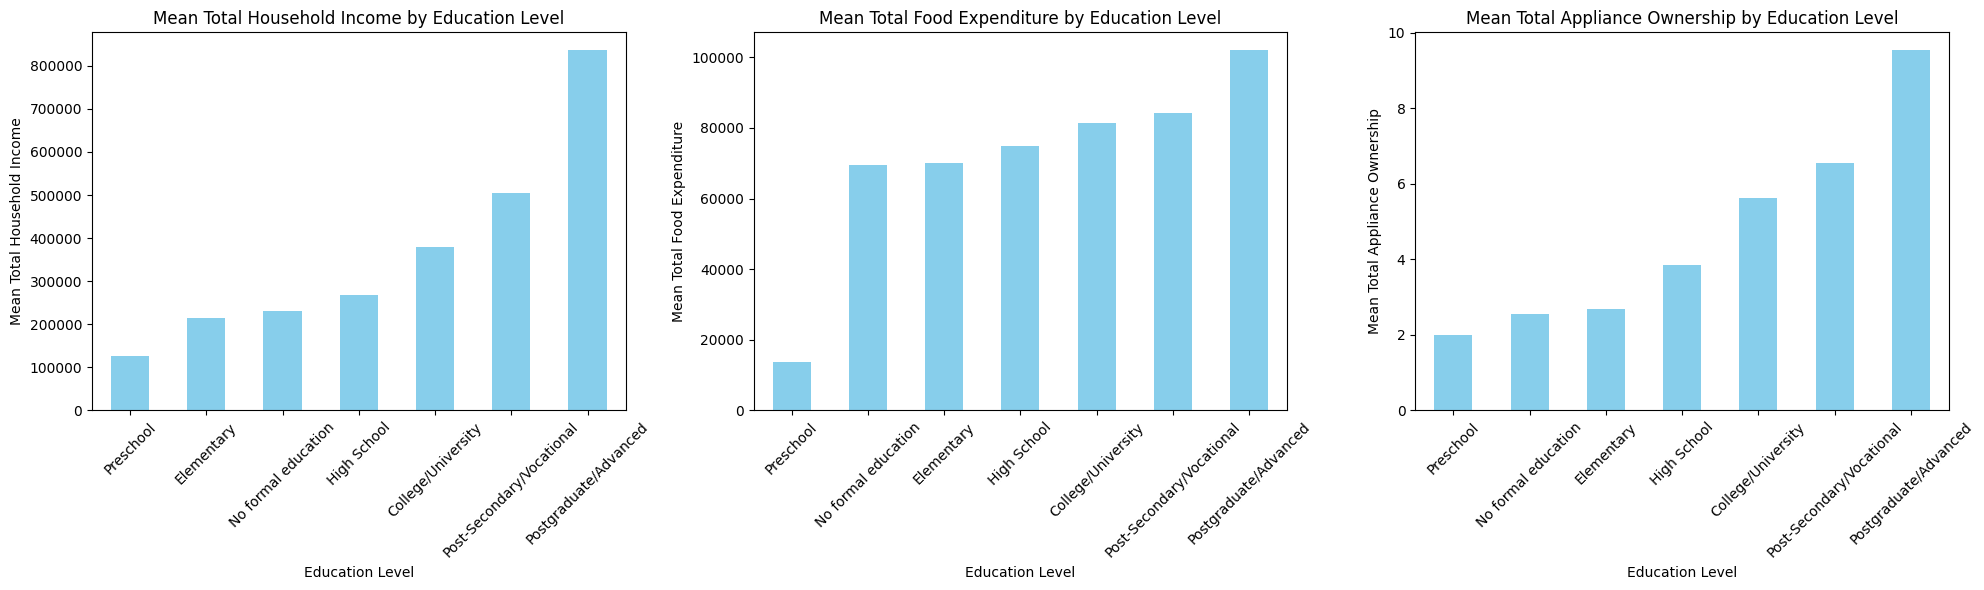

In [84]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(20,6))  # 1 row, 3 columns

for i, var in enumerate(predictive_vars):
    mean_values = df_ivA.groupby('Education_Group')[var].mean().sort_values()
    mean_values.plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Mean {var.replace("_"," ")} by Education Level')
    axes[i].set_xlabel('Education Level')
    axes[i].set_ylabel(f'Mean {var.replace("_"," ")}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


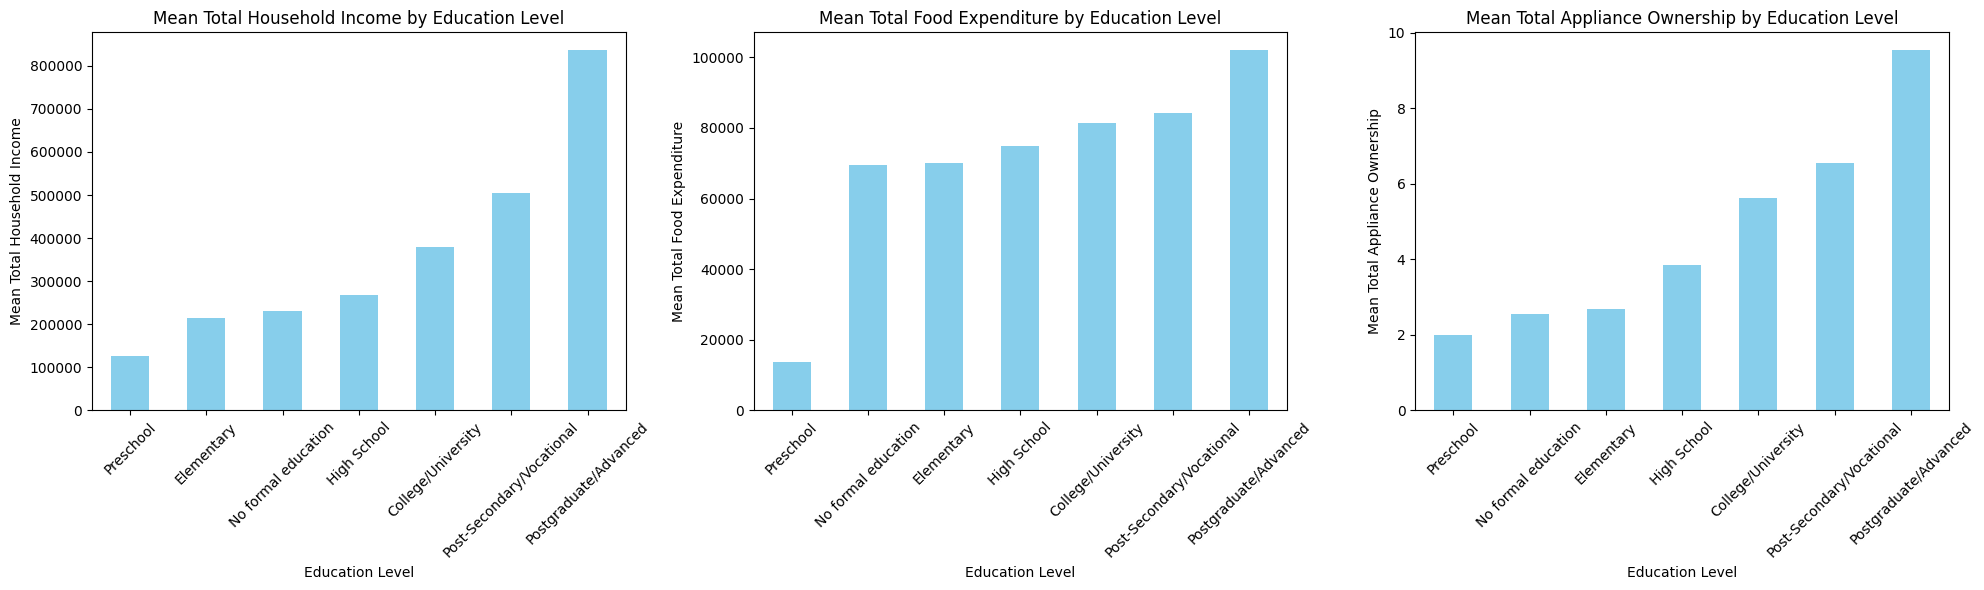

In [75]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(20,6))  # 1 row, 3 columns

for i, var in enumerate(predictive_vars):
    mean_values = df_ivA.groupby('Education_Group')[var].mean().sort_values()
    mean_values.plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Mean {var.replace("_"," ")} by Education Level')
    axes[i].set_xlabel('Education Level')
    axes[i].set_ylabel(f'Mean {var.replace("_"," ")}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [76]:
from sklearn.preprocessing import OrdinalEncoder

education_order = [
    'Preschool',
    'No formal education',
    'Elementary',
    'High School',
    'College/University',
    'Post-Secondary/Vocational',
    'Postgraduate/Advanced'
]

encoder = OrdinalEncoder(categories=[education_order])
df_ivA['Education_Level_Num'] = encoder.fit_transform(df_ivA[['Education_Group']])


In [77]:
X = df_ivA[['Education_Level_Num']]  # Predictor: education level

y_income = df_ivA['Total Household Income']
y_food = df_ivA['Total_Food_Expenditure']
y_appliance = df_ivA['Total_Appliance_Ownership']


In [78]:
from sklearn.linear_model import LinearRegression

# Function to fit and summarize
def fit_linear_regression(X, y, target_name):
    model = LinearRegression()
    model.fit(X, y)
    r2 = model.score(X, y)
    coef = model.coef_[0]
    intercept = model.intercept_
    print(f"{target_name} ~ Education_Level_Num")
    print(f"Coefficient: {coef:.2f} | Intercept: {intercept:.2f} | R^2: {r2:.3f}\n")
    return model

# Fit models
model_income = fit_linear_regression(X, y_income, "Household Income")
model_food = fit_linear_regression(X, y_food, "Food Expenditure")
model_appliance = fit_linear_regression(X, y_appliance, "Appliance Ownership")


Household Income ~ Education_Level_Num
Coefficient: 97877.31 | Intercept: -854.00 | R^2: 0.136

Food Expenditure ~ Education_Level_Num
Coefficient: 5032.57 | Intercept: 59924.82 | R^2: 0.021

Appliance Ownership ~ Education_Level_Num
Coefficient: 1.32 | Intercept: 0.02 | R^2: 0.200



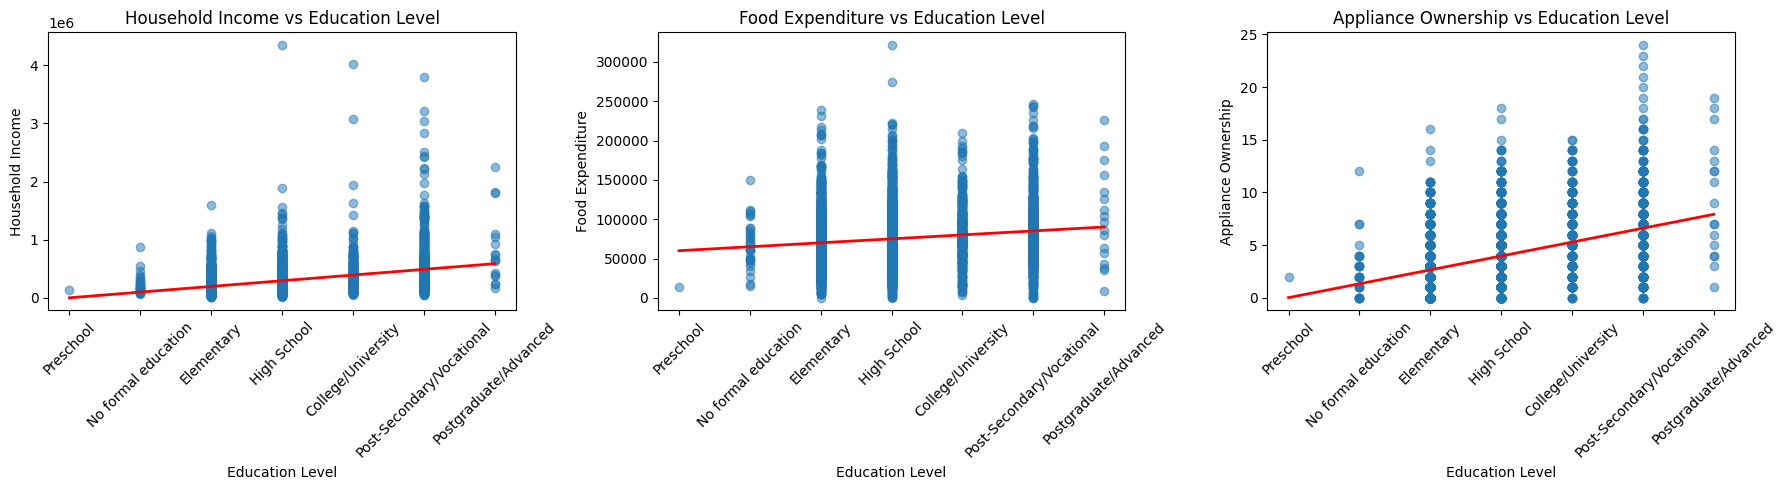

In [79]:
import numpy as np

plt.figure(figsize=(18,5))

targets = [('Household Income', y_income), ('Food Expenditure', y_food), ('Appliance Ownership', y_appliance)]

for i, (name, y) in enumerate(targets, 1):
    plt.subplot(1, 3, i)
    plt.scatter(df_ivA['Education_Level_Num'], y, alpha=0.5)
    # Regression line
    line_x = np.array([0, len(education_order)-1]).reshape(-1,1)
    line_y = model_income.intercept_ + model_income.coef_[0]*line_x if name=="Household Income" else \
             model_food.intercept_ + model_food.coef_[0]*line_x if name=="Food Expenditure" else \
             model_appliance.intercept_ + model_appliance.coef_[0]*line_x
    plt.plot(line_x, line_y, color='red', linewidth=2)
    plt.xticks(ticks=range(len(education_order)), labels=education_order, rotation=45)
    plt.title(f'{name} vs Education Level')
    plt.ylabel(name)
    plt.xlabel('Education Level')

plt.tight_layout()
plt.show()


In [86]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Numeric education levels
X_vals = np.arange(len(education_order)).reshape(-1,1)

# Mean values per education level (for plotting actual points)
mean_income = df_ivA.groupby('Education_Group')['Total Household Income'].mean().reindex(education_order)
mean_food = df_ivA.groupby('Education_Group')['Total_Food_Expenditure'].mean().reindex(education_order)
mean_appliance = df_ivA.groupby('Education_Group')['Total_Appliance_Ownership'].mean().reindex(education_order)

# Predicted values from linear regression
pred_income = model_income.predict(X_vals)
pred_food = model_food.predict(X_vals)
pred_appliance = model_appliance.predict(X_vals)

# List of appliance columns
appliance_cols = [
    'Number of Refrigerator/Freezer',
    'Number of Washing Machine',
    'Number of Airconditioner',
    'Number of Car, Jeep, Van',
    'Number of Cellular phone',
    'Number of Personal Computer'
]

# Replace NaNs with 0 before summing
df_ivA[appliance_cols] = df_ivA[appliance_cols].fillna(0)

# Create total appliance ownership column
df_ivA['Total_Appliance_Ownership'] = df_ivA[appliance_cols].sum(axis=1)



In [87]:
df_ivA['Total_Appliance_Ownership'].describe()


count    4162.000000
mean        4.111245
std         3.135316
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        24.000000
Name: Total_Appliance_Ownership, dtype: float64

In [88]:
from sklearn.linear_model import LinearRegression

X = df_ivA[['Education_Level_Num']]
y_appliance = df_ivA['Total_Appliance_Ownership']

model_appliance = LinearRegression()
model_appliance.fit(X, y_appliance)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


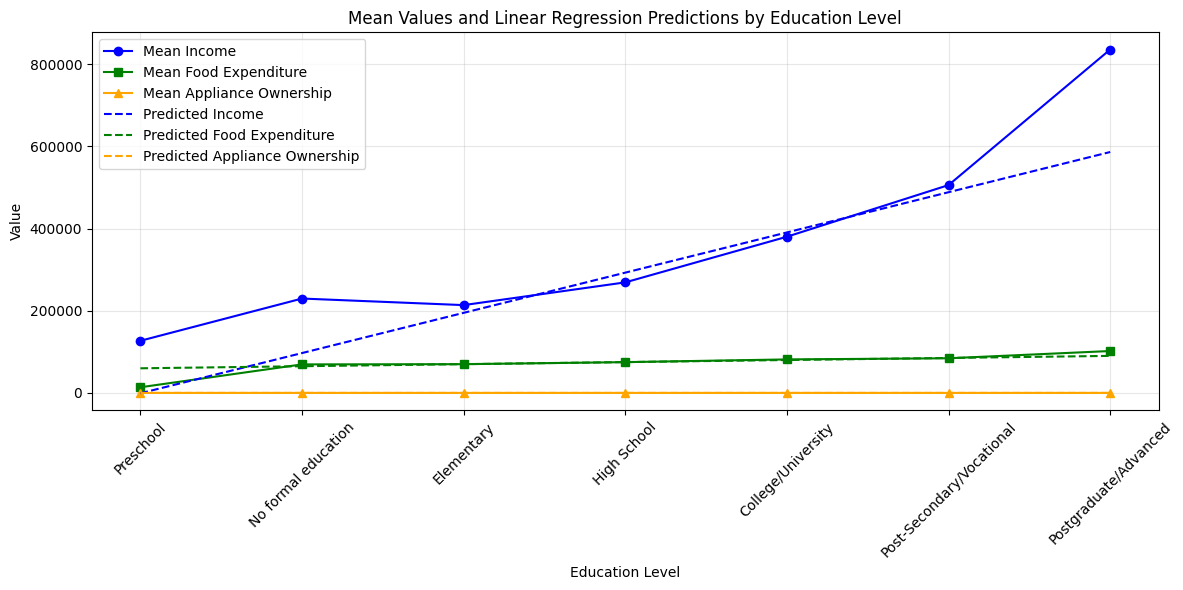

In [89]:
plt.figure(figsize=(12,6))

# Plot actual mean points
plt.plot(education_order, mean_income, marker='o', color='blue', label='Mean Income')
plt.plot(education_order, mean_food, marker='s', color='green', label='Mean Food Expenditure')
plt.plot(education_order, mean_appliance, marker='^', color='orange', label='Mean Appliance Ownership')

# Plot regression prediction lines
plt.plot(education_order, pred_income, linestyle='--', color='blue', label='Predicted Income')
plt.plot(education_order, pred_food, linestyle='--', color='green', label='Predicted Food Expenditure')
plt.plot(education_order, pred_appliance, linestyle='--', color='orange', label='Predicted Appliance Ownership')

# Labels and title
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Value')
plt.title('Mean Values and Linear Regression Predictions by Education Level')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


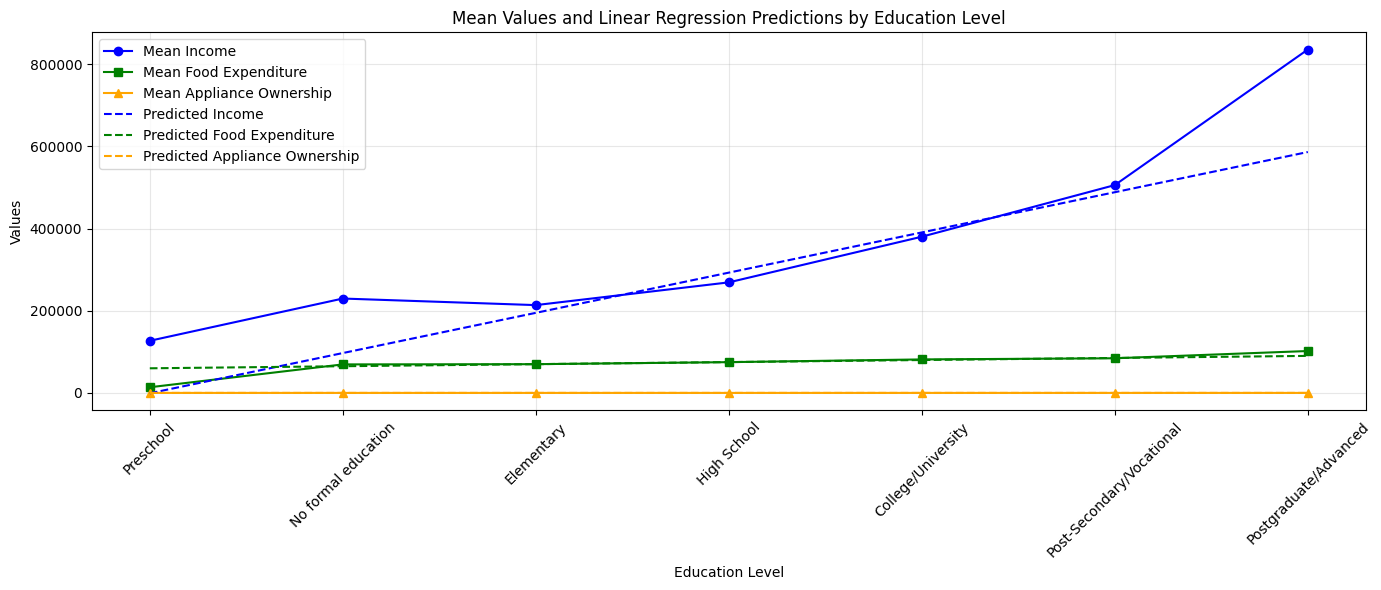

In [90]:
# -----------------------------
# Imports and settings
# -----------------------------
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression

# -----------------------------
# Ensure appliance ownership is correct
# -----------------------------
appliance_cols = [
    'Number of Refrigerator/Freezer',
    'Number of Washing Machine',
    'Number of Airconditioner',
    'Number of Car, Jeep, Van',
    'Number of Cellular phone',
    'Number of Personal Computer'
]

# Fill NaNs with 0 and sum
df_ivA[appliance_cols] = df_ivA[appliance_cols].fillna(0)
df_ivA['Total_Appliance_Ownership'] = df_ivA[appliance_cols].sum(axis=1)

# -----------------------------
# Encode education level
# -----------------------------
education_order = [
    'Preschool',
    'No formal education',
    'Elementary',
    'High School',
    'College/University',
    'Post-Secondary/Vocational',
    'Postgraduate/Advanced'
]

encoder = OrdinalEncoder(categories=[education_order])
df_ivA['Education_Level_Num'] = encoder.fit_transform(df_ivA[['Education_Group']])

# -----------------------------
# Prepare target variables
# -----------------------------
X_vals = np.arange(len(education_order)).reshape(-1,1)
X = df_ivA[['Education_Level_Num']]

y_income = df_ivA['Total Household Income']
y_food = df_ivA['Total_Food_Expenditure']
y_appliance = df_ivA['Total_Appliance_Ownership']

# Fit linear regression models
model_income = LinearRegression().fit(X, y_income)
model_food = LinearRegression().fit(X, y_food)
model_appliance = LinearRegression().fit(X, y_appliance)

# -----------------------------
# Mean values per education
# -----------------------------
mean_income = df_ivA.groupby('Education_Group')['Total Household Income'].mean().reindex(education_order)
mean_food = df_ivA.groupby('Education_Group')['Total_Food_Expenditure'].mean().reindex(education_order)
mean_appliance = df_ivA.groupby('Education_Group')['Total_Appliance_Ownership'].mean().reindex(education_order)

# Predicted values from regression
pred_income = model_income.predict(X_vals)
pred_food = model_food.predict(X_vals)
pred_appliance = model_appliance.predict(X_vals)

# -----------------------------
# Stacked line plot
# -----------------------------
plt.figure(figsize=(14,6))

# Plot mean values
plt.plot(education_order, mean_income, marker='o', color='blue', label='Mean Income')
plt.plot(education_order, mean_food, marker='s', color='green', label='Mean Food Expenditure')
plt.plot(education_order, mean_appliance, marker='^', color='orange', label='Mean Appliance Ownership')

# Plot predicted regression lines
plt.plot(education_order, pred_income, linestyle='--', color='blue', label='Predicted Income')
plt.plot(education_order, pred_food, linestyle='--', color='green', label='Predicted Food Expenditure')
plt.plot(education_order, pred_appliance, linestyle='--', color='orange', label='Predicted Appliance Ownership')

# Labels, legend, and grid
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Values')
plt.title('Mean Values and Linear Regression Predictions by Education Level')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


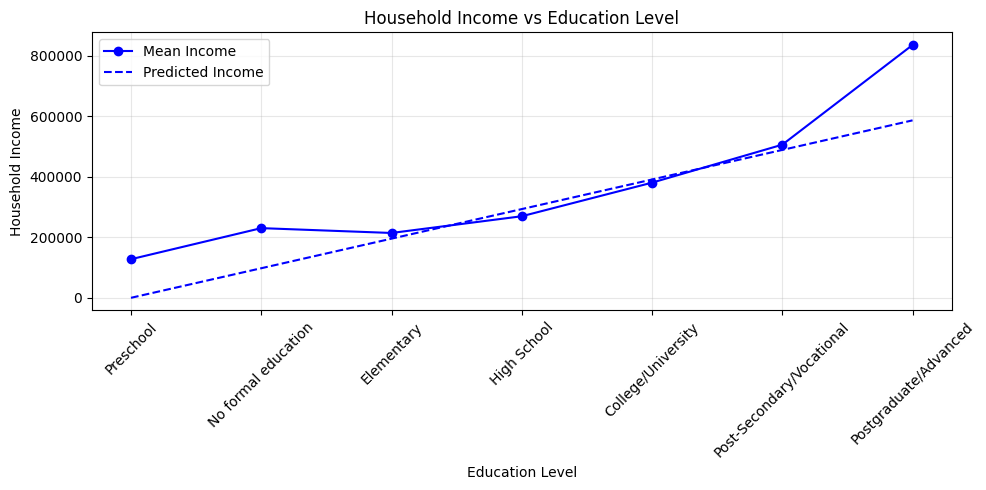

In [91]:
plt.figure(figsize=(10,5))

# Mean and predicted income
plt.plot(education_order, mean_income, marker='o', color='blue', label='Mean Income')
plt.plot(education_order, pred_income, linestyle='--', color='blue', label='Predicted Income')

plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Household Income')
plt.title('Household Income vs Education Level')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


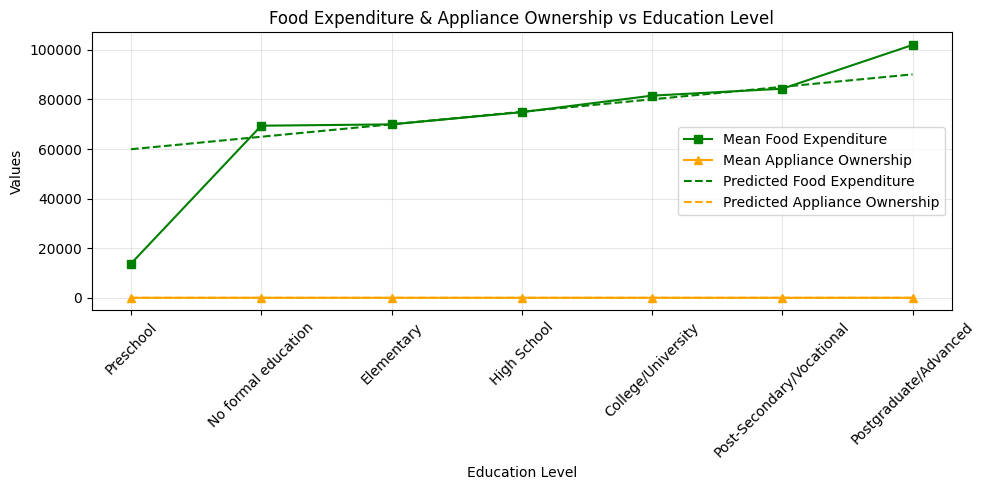

In [92]:
plt.figure(figsize=(10,5))

# Mean values
plt.plot(education_order, mean_food, marker='s', color='green', label='Mean Food Expenditure')
plt.plot(education_order, mean_appliance, marker='^', color='orange', label='Mean Appliance Ownership')

# Predicted lines
plt.plot(education_order, pred_food, linestyle='--', color='green', label='Predicted Food Expenditure')
plt.plot(education_order, pred_appliance, linestyle='--', color='orange', label='Predicted Appliance Ownership')

plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Values')
plt.title('Food Expenditure & Appliance Ownership vs Education Level')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


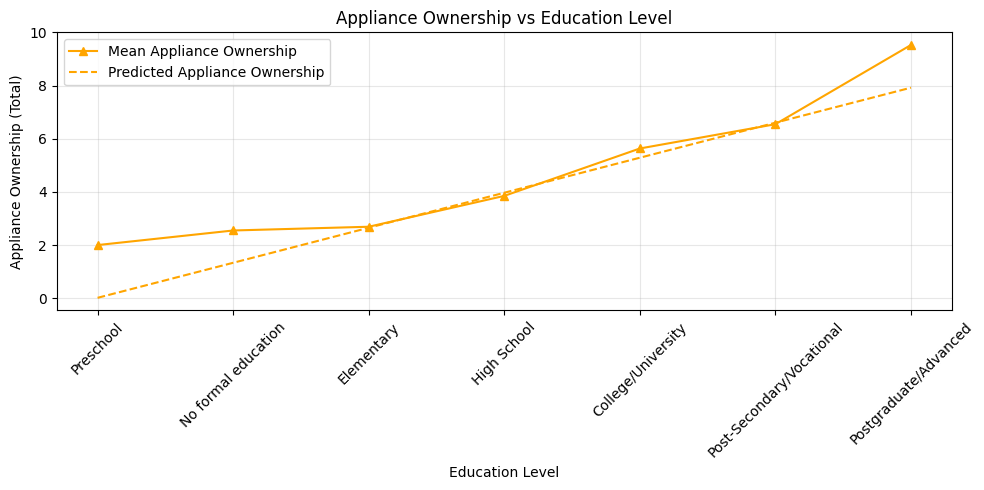

In [93]:
plt.figure(figsize=(10,5))

# Mean and predicted appliance ownership
plt.plot(education_order, mean_appliance, marker='^', color='orange', label='Mean Appliance Ownership')
plt.plot(education_order, pred_appliance, linestyle='--', color='orange', label='Predicted Appliance Ownership')

plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Appliance Ownership (Total)')
plt.title('Appliance Ownership vs Education Level')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


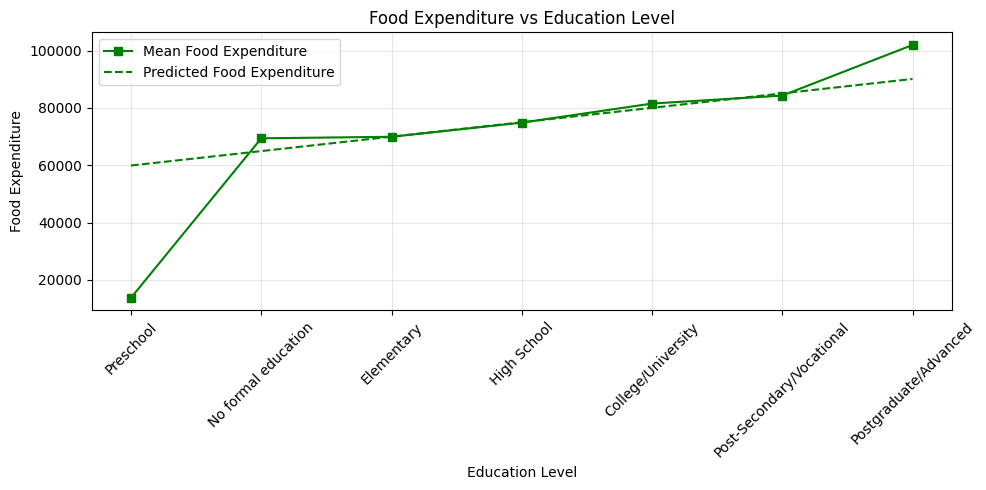

In [94]:
plt.figure(figsize=(10,5))

# Mean and predicted food expenditure
plt.plot(education_order, mean_food, marker='s', color='green', label='Mean Food Expenditure')
plt.plot(education_order, pred_food, linestyle='--', color='green', label='Predicted Food Expenditure')

plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Food Expenditure')
plt.title('Food Expenditure vs Education Level')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
